In [95]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as ppl
import seaborn as sns
from sklearn import tree

In [96]:
data_train = pd.read_csv('train_iris.csv', index_col=0)
data_test = pd.read_csv('test_iris.csv', index_col=0)
data_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [97]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
X_train = data_train.iloc[:, :4]
y_train = data_train.species
X_test = data_test.iloc[:, :4]
y_test = data_test.species

In [98]:
decision_tree = decision_tree.fit(X=X_train, y=y_train)
decision_tree.score(X_test, y_test)
# tree.plot_tree(decision_tree=decision_tree, feature_names=data_train.columns)

0.92

In [99]:
score_data = pd.DataFrame()
depth_compare = range(1, 101)
for i in depth_compare:
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=i-1, max_depth=i)
    decision_tree.fit(X=X_train, y=y_train)
    train_score = decision_tree.score(X_train, y_train)
    test_score = decision_tree.score(X_test, y_test)

    tmp_row = pd.DataFrame({'depth': [i], 'train_score': [train_score], 'test_score': [test_score]})
    score_data = score_data.append(tmp_row)

C:\Users\Ivan Demkov\AppData\Local\Temp\ipykernel_17320\959501375.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(tmp_row)
C:\Users\Ivan Demkov\AppData\Local\Temp\ipykernel_17320\959501375.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(tmp_row)
C:\Users\Ivan Demkov\AppData\Local\Temp\ipykernel_17320\959501375.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(tmp_row)
C:\Users\Ivan Demkov\AppData\Local\Temp\ipykernel_17320\959501375.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(tmp_row)
C:\Users

In [100]:
score_data_long = pd.melt(score_data, id_vars=['depth'], value_vars=['train_score', 'test_score'], var_name='set_type', value_name='score')

In [101]:
score_data_long

,depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
195,96,test_score,0.92
196,97,test_score,0.92
197,98,test_score,0.92
198,99,test_score,0.92


<Axes: xlabel='depth', ylabel='score'>

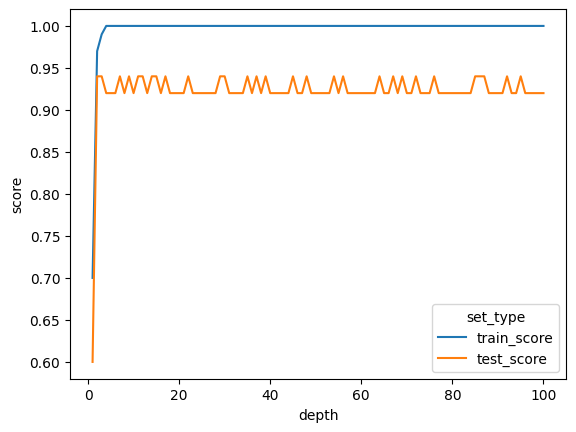

In [102]:
sns.lineplot(x='depth', y='score', hue='set_type', data=score_data_long)